<a href="https://colab.research.google.com/github/Miron-Hanukaiev/Introduction_to_Cloud_Computing/blob/main/MyFirstColabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
print(time.ctime())

Tue Oct 28 09:14:03 2025


In [ ]:
print("Hello, world!")

Hello, world!


In [ ]:
!pip install numpy

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"


MyFirstColabNotebook.ipynb


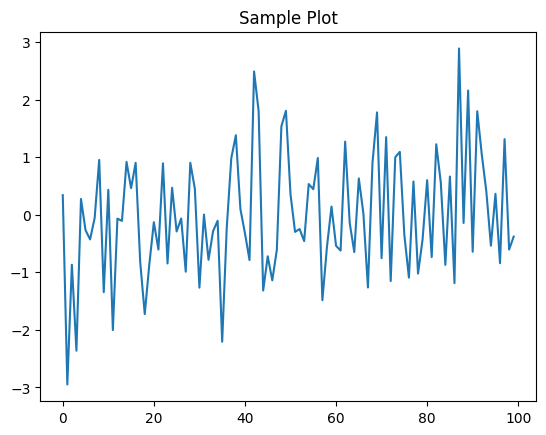

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y, '-')
plt.fill_between(x, y, 200, where = (y > 195), facecolor='g', alpha=0.6)

plt.title("Sample Plot")
plt.show()


In [ ]:
# @title My First Form
sleeptime = 4 # @param {"type":"integer","placeholder":"Please enter your name"}
import time
print(time.ctime())
time.sleep(sleeptime)
print(time.ctime())


Tue Oct 28 09:42:39 2025
Tue Oct 28 09:42:43 2025


In [ ]:
name = "Eliran"  #@param {type:"string"}
print("Hello,", name)

Hello, Eliran


In [ ]:
color = 'green' #@param ["red", "green", "blue"]
print(color)


green


In [ ]:
date_input = '2019-07-15' #@param {type:"date"}
print(date_input)


2019-07-15


In [ ]:
#@title Default title text
%%html
<style>
body {
  background-color: #f2bcca;
}
</style>
color = green #@param ["red", "green", "blue"] print(color)
<svg xmlns="https://www.w3.org/2000/svg" viewBox="0 0 600 400" width="400" height="400">
   <rect x="10" y="00" width="300" height="100" rx="0" style="fill:orange; stroke:black; fill-opacity:1.0" />
   <rect x="10" y="100" width="300" height="100" rx="0" style="fill:white; stroke:black; fill-opacity:1.0;" />
   <rect x="10" y="200" width="300" height="100" rx="0" style="fill:green; stroke:black; fill-opacity:1.0;" />
</svg>


In [ ]:
#התחברות לדרייב
cd /content/drive/MyDrive


/content/drive/MyDrive


In [ ]:
with open('1.txt', 'r') as file:
    contents = file.read()
    print(contents)
    file.close()

One
Two
Three


In [8]:
#Overwrite the text file with 'w'
with open('/content/drive/My Drive/example.txt', 'w') as file:
    file.write('This is some example text.')
    file.close()



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/example.txt'

In [ ]:
#Adding the text to the file with 'a'
with open('/content/drive/My Drive/example.txt', 'a') as file:
  file.write('\nThis is some more example text.')
  file.close()


In [ ]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    with open('/content/drive/My Drive/1.txt', 'r') as file:
      contents = file.read()
      print(contents)

button.on_click(on_button_clicked)
display(button, output)



Button(description='Click Me!', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
slider = widgets.IntSlider(value=5, max=10)
display(slider)


IntSlider(value=5, max=10)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# @title class ex1
import ipywidgets as widgets
from IPython.display import display, HTML

# Reading the file from the drive
with open('/content/drive/MyDrive/students.txt', 'r') as file:
    contents = file.read()

# Splits the content into lines
lines = contents.splitlines()
students = []

display(HTML("""
<style>
body {
  background-color: #3b2a77;
  color: #f0eaff;
  font-family: 'Segoe UI', sans-serif;
}
h3 {
  color: #d1c4e9;
}
p {
  color: #dcd0ff;
}
.widget-label {
  color: #e1bee7 !important;
  font-weight: bold;
}
input {
  background-color: #5e4aa1 !important;
  color: #ffffff !important;
  border: 1px solid #b39ddb !important;
}
.widget-dropdown > select {
  background-color: #5e4aa1 !important;
  color: #ffffff !important;
  border: 1px solid #b39ddb !important;
}
</style>


<h3>Students Data</h3>
<p>Choose a student, and the details will appear below:</p>
"""))

# Goes over every line in the file and builds a dict with the data
for line in lines:
    parts = line.split()
    name = parts[0] + " " + parts[1]
    email = parts[2]
    link = [p for p in parts if p.startswith("https")][-1]
    courses = "\n".join(parts[3:parts.index(link)])
    students.append({
        "name": name,
        "email": email,
        "courses": courses,
        "link": link
    })

# Takes all of the names into seperated list so it will be in the dropdown
student_names = [s["name"] for s in students]

dropdown = widgets.Dropdown(
    options=student_names,
    description='Student:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

dropdown.value = None

email_box = widgets.Textarea(
    value='',
    description='Email:',
    layout=widgets.Layout(width='600px', height='40px')
)

courses_box = widgets.Textarea(
    value='',
    description='Courses:',
    layout=widgets.Layout(width='600px', height='120px')
)

link_box = widgets.Textarea(
    value='',
    description='Link:',
    layout=widgets.Layout(width='600px', height='40px')
)

fav_course_box = widgets.Text(
    value='',
    placeholder='Type your favorite course...',
    description='Favorite:',
    layout=widgets.Layout(width='600px')
)

update_button = widgets.Button(
    description='Update File',
    button_style='success',
    tooltip='Save favorite course to file',
    layout=widgets.Layout(width='200px')
)


# Function that updates the field depending on which name has been selected
def update_fields(change):
    selected_name = change['new']
    for s in students:
        if s["name"] == selected_name:
            email_box.value = s["email"]
            courses_box.value = s["courses"]
            link_box.value = s["link"]

# Connects between the choice and the function
dropdown.observe(update_fields, names='value')

# Showing all of the elements on the screen
display(dropdown, email_box, courses_box, link_box)

# Function to handle the update process
def update_file(b):
    selected_name = dropdown.value
    favorite = fav_course_box.value.strip()
    if not selected_name:
        print("Please select a student first.")
        return
    if not favorite:
        print("Please type a favorite course first.")
        return

    # Add favorite course to the selected student
    for s in students:
        if s["name"] == selected_name:
            s["favorite"] = favorite

    # Append mode ('a') - keeps old data, adds new entry
    with open('/content/drive/MyDrive/students.txt', 'a') as file:
        for s in students:
            if "favorite" in s:
                file.write(f"{s['name']} {s['email']} {s['courses'].replace(chr(10), ' ')} {s['link']} Favorite:{s['favorite']}\n")

    print(f"{selected_name}'s favorite course added successfully!")

# Connect the button to the function
update_button.on_click(update_file)

# Display the new input and button
display(fav_course_box, update_button)


Dropdown(description='Student:', layout=Layout(width='400px'), options=('Eliran Melihov', 'Miron Hanukaev'), s…

Textarea(value='', description='Email:', layout=Layout(height='40px', width='600px'))

Textarea(value='', description='Courses:', layout=Layout(height='120px', width='600px'))

Textarea(value='', description='Link:', layout=Layout(height='40px', width='600px'))

Text(value='', description='Favorite:', layout=Layout(width='600px'), placeholder='Type your favorite course..…

Button(button_style='success', description='Update File', layout=Layout(width='200px'), style=ButtonStyle(), t…

Eliran Melihov's favorite course added successfully!
Miron Hanukaev's favorite course added successfully!
Miron Hanukaev's favorite course added successfully!
Miron Hanukaev's favorite course added successfully!
